Model kaydedildi: random_forest_model.joblib
Model yüklendi.
Accuracy: 99.45%
Classification Report:
              precision    recall  f1-score   support

        elif       1.00      1.00      1.00        59
        irem       0.99      1.00      0.99        71
       nazli       1.00      0.98      0.99        53

    accuracy                           0.99       183
   macro avg       1.00      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

Confusion Matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  1 52]]
True label: elif
Predicted label: elif


c:\Users\elifv\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\elifv\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\elifv\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature nam

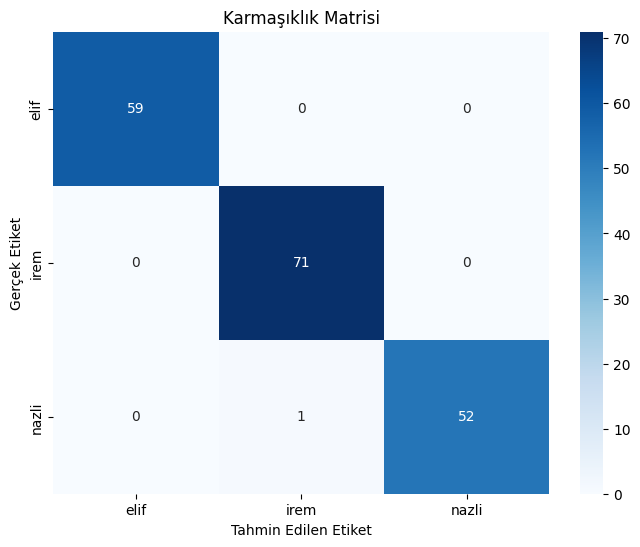

In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
features_df = pd.read_csv('../Data/balanced_audio_features.csv')

# Özellikler (X) ve etiketler (y)
X = features_df.drop(columns=['label'])  # 'label' sütununu çıkararak sadece özellikleri alıyoruz
y = features_df['label']  # Etiket olarak 'label' sütununu alıyoruz

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dengeleme için SMOTE ya da RandomOverSampler kullanabilirsiniz
# SMOTE ile sınıf dengesini sağlama
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Veya RandomOverSampler ile sınıf dengesini sağlama
# ros = RandomOverSampler(random_state=42)
# X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Dengelediğimiz verilerle model eğitme
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Modeli kaydetme
joblib.dump(rf_model, 'random_forest_model1.joblib')
print("Model kaydedildi: random_forest_model.joblib")

# Modeli yükleme ve test etme
loaded_model = joblib.load('random_forest_model.joblib')
print("Model yüklendi.")

# Test verisi üzerinde model değerlendirmesi
y_pred = loaded_model.predict(X_test)

# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Modelin daha detaylı değerlendirilmesi (precision, recall, F1 score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Konfüzyon matrisi
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Örnek bir tahmin
sample_index = 80  # Test setinden bir örnek seçiyoruz
sample = X_test.iloc[sample_index]
true_label = y_test.iloc[sample_index]
predicted_label = loaded_model.predict([sample])[0]

print(f"True label: {true_label}")
print(f"Predicted label: {predicted_label}")

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=loaded_model.classes_ if hasattr(loaded_model, 'classes_') else None,
            yticklabels=loaded_model.classes_ if hasattr(loaded_model, 'classes_') else None)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()
